c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


['(0) noOfWords', '(1) noOfCharacters', '(2) noOfUniqueWords', '(3) noOfAdvCount', '(4) sentCount', '(5) avgWordLength', '(6) noOfNounCount', '(7) avgSentenceLength', '(8) noOfAdjCount', '(9) noOfExclamation', '(10) noOfSpellErrors', '(11) noOfCommas', '(12) noOfVerbCount', '(13) noOfSemicolons', '(14) stdDeviationSentence', '(15) noOfQuestions', '(16) keywordRelevance', '(17) meanWorldLength']


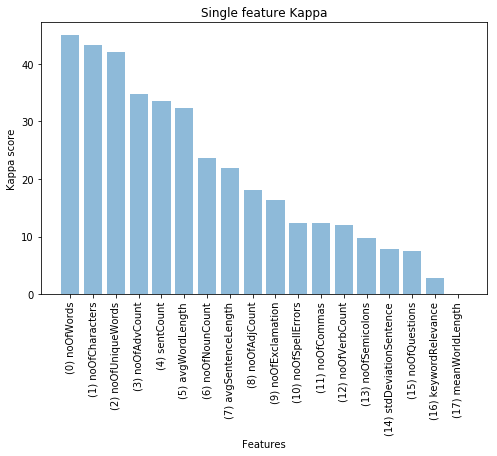

Max Kappa score is:
72.9987
Max Kappa Score feature list:
['noOfWords', 'noOfCharacters', 'noOfUniqueWords', 'noOfAdvCount', 'sentCount', 'avgWordLength', 'noOfNounCount', 'avgSentenceLength', 'noOfAdjCount', 'noOfExclamation', 'noOfSpellErrors', 'noOfCommas', 'noOfVerbCount', 'noOfSemicolons', 'stdDeviationSentence', 'noOfQuestions', 'keywordRelevance']


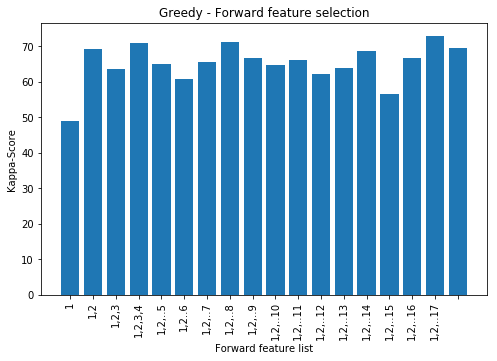

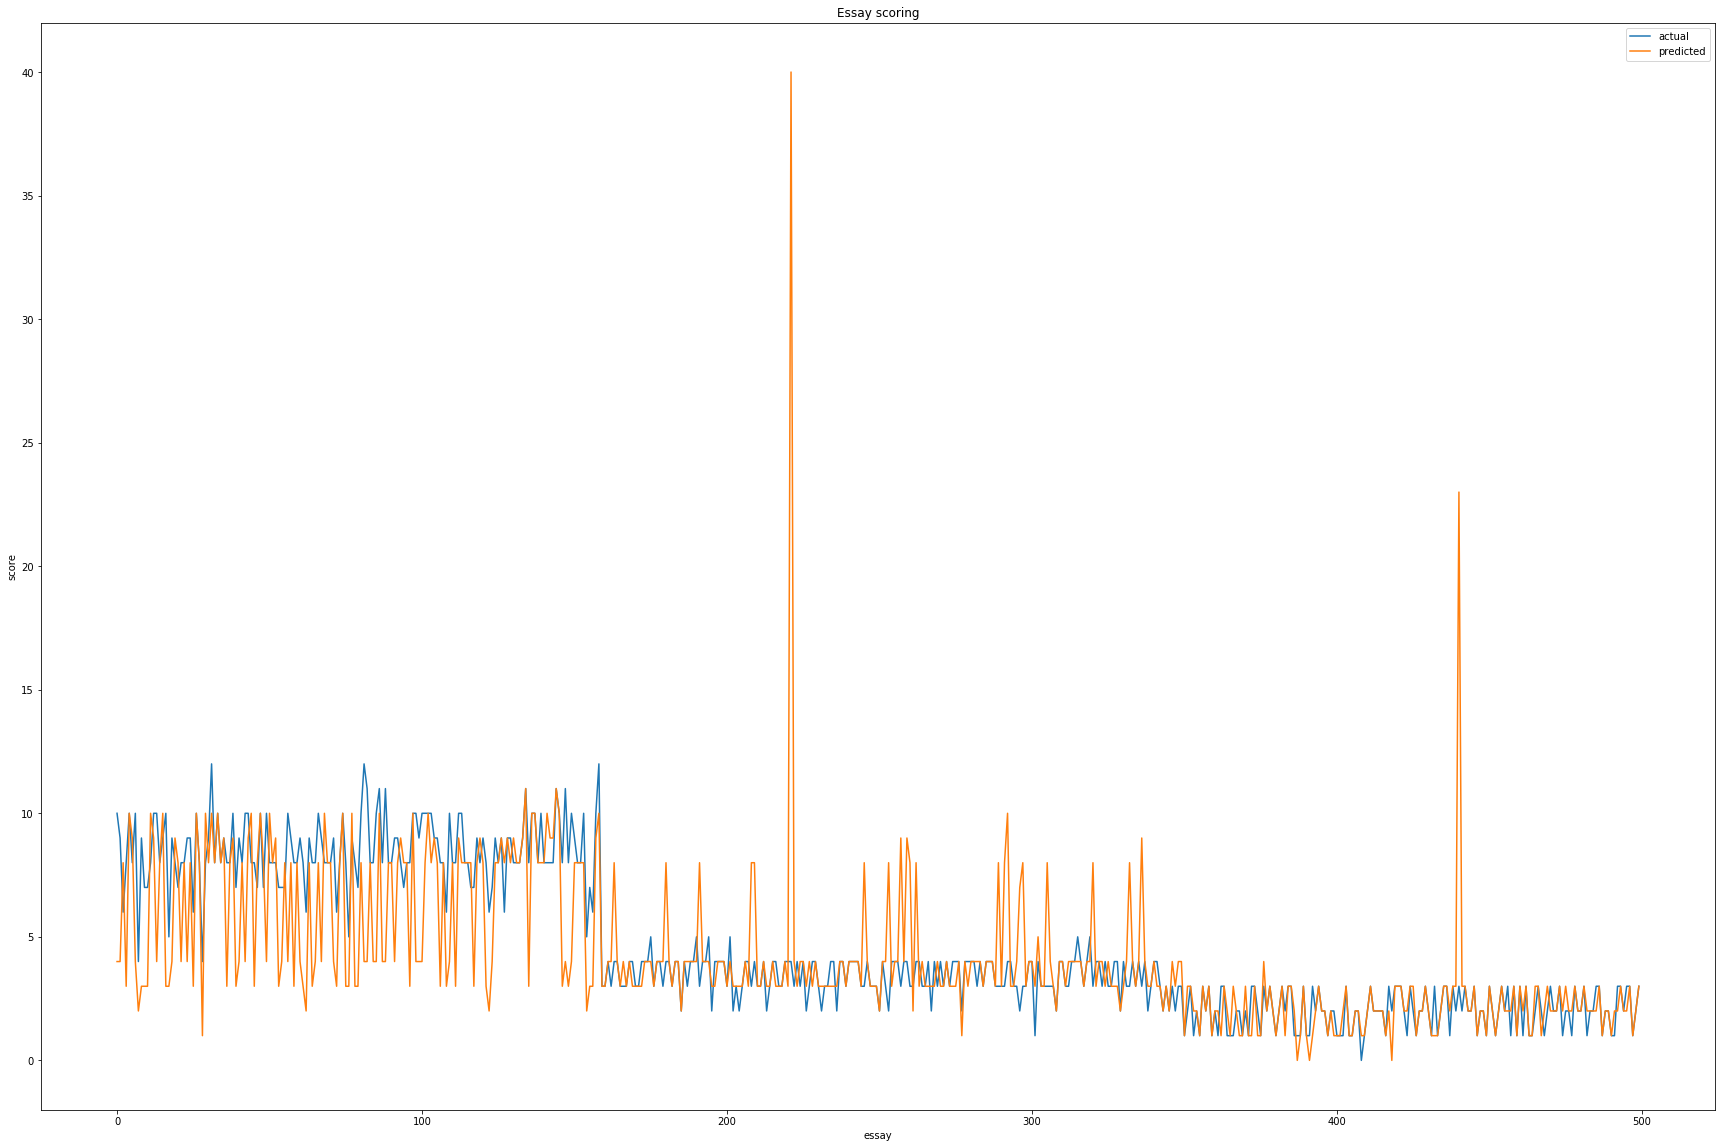

0.698389904041


['noOfWords',
 'noOfCharacters',
 'noOfUniqueWords',
 'noOfAdvCount',
 'sentCount',
 'avgWordLength',
 'noOfNounCount',
 'avgSentenceLength',
 'noOfAdjCount',
 'noOfExclamation',
 'noOfSpellErrors',
 'noOfCommas',
 'noOfVerbCount',
 'noOfSemicolons',
 'stdDeviationSentence',
 'noOfQuestions',
 'keywordRelevance']

In [1]:
# import libraries: dataframe manipulation, machine learning, os tools
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn import preprocessing
import sklearn.metrics
import csv
# Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn import cross_validation
from time import time
from metrics import kappa

noOfFolds = 10
noOfTrees = 160

def Evaluate(X_all,y_all,feature_list):
    # n_estimators is the amount of trees to build
     #Simple K-Fold cross validation. 5 folds.
    cv = cross_validation.KFold(len(predictors), n_folds=noOfFolds,shuffle=True)
    results = []
    model=RandomForestClassifier(n_estimators=noOfTrees,min_samples_split=3)
    results = []
    for traincv, testcv in cv:
        X_test, X_train, y_test, y_train = X_all.iloc[testcv], X_all.iloc[traincv], y_all.iloc[testcv], y_all.iloc[traincv]
        final_train_data = X_train[feature_list]
        final_test_data = X_test[feature_list]

        model.fit(final_train_data,y_train)
        start = time()
        y_pred = model.predict(final_test_data)
        end = time()

        # confusion matrix / missclassification matrix
        #print sklearn.metrics.confusion_matrix(y_test.values,y_pred)
        #print sklearn.metrics.accuracy_score(y_test.values, y_pred)
        result = kappa(y_test.values,y_pred,weights='quadratic')
        results.append(result)

        return str(np.array(results).mean())


def Evaluatefinal(X_all,y_all,feature_list):
    # n_estimators is the amount of trees to build
     #Simple K-Fold cross validation. 5 folds.
    cv = cross_validation.KFold(len(predictors), n_folds=noOfFolds,shuffle=True)
    results = []
    model=RandomForestClassifier(n_estimators=noOfTrees,min_samples_split=3)
    results = []
    for traincv, testcv in cv:
        X_test, X_train, y_test, y_train = X_all.iloc[testcv], X_all.iloc[traincv], y_all.iloc[testcv], y_all.iloc[traincv]
        final_train_data = X_train[feature_list]
        final_test_data = X_test[feature_list]

        model.fit(final_train_data,y_train)
        start = time()
        y_pred = model.predict(final_test_data)
        end = time()

        # confusion matrix / missclassification matrix
        result = kappa(y_test.values,y_pred,weights='quadratic')
        results.append(result)

        # line 1 points
        plt.figure(figsize=(30,20))
        #x1 = range(0,y_test.count())
        x1 = range(0,500)
        y1 = y_test.values[:500]
        # plotting the line 1 points 
        plt.plot(x1, y1, label = "actual")

        # line 2 points
        x2 = x1
        y2 = y_pred[:500]
        # plotting the line 2 points 
        plt.plot(x2, y2, label = "predicted")

        # naming the x axis
        plt.xlabel('essay')
        # naming the y axis
        plt.ylabel('score')
        # giving a title to my graph
        plt.title('Essay scoring')

        # show a legend on the plot
        plt.legend()

        # function to show the plot
        plt.show()
        return str(np.array(results).mean())
    


essay_data = pd.read_csv("feature.csv")
data_clean = essay_data.dropna()

# encode categorical features
# done in R (C:\Users\JD87417\Desktop\python work\Coursera\python_adult2_clean.R)

# summary statistics including counts, mean, stdev, quartiles
data_clean.head(n=5)
data_clean.dtypes # data types of each variable
data_clean.describe()

# Split into training and testing sets
# Specifying predictor x variables
predictors = data_clean[["noOfCharacters","noOfWords","noOfUniqueWords","sentCount","noOfCommas","noOfSemicolons","noOfQuestions","noOfExclamation","noOfSpellErrors","meanWorldLength","avgWordLength","avgSentenceLength","stdDeviationSentence","noOfNounCount","noOfVerbCount","noOfAdjCount","noOfAdvCount","keywordRelevance"]]
feature_list = ["noOfCharacters","noOfWords","noOfUniqueWords","sentCount","noOfCommas","noOfSemicolons","noOfQuestions","noOfExclamation","noOfSpellErrors","meanWorldLength","avgWordLength","avgSentenceLength","stdDeviationSentence","noOfNounCount","noOfVerbCount","noOfAdjCount","noOfAdvCount","keywordRelevance"]
# y repsonse variable
targets = data_clean.score

# concurrent split of x's, y, at 40%
#pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)


X_all=predictors
y_all=targets
# Build model on training data
from sklearn.ensemble import RandomForestClassifier
feature_dict = {}
# Evaluating performance of individual features.    
for f in feature_list:
    score1 = Evaluate(X_all,y_all,[f]) #helper function to evaluate the feature on the entire data set using 5 fold cross validation.
    feature_dict[f] = round(float(score1)*100,4)
feature_dict


import operator
sorted_feature_list = sorted(feature_dict.items(), key=operator.itemgetter(1),reverse=True)

objects = [x[1] for x in sorted_feature_list]
features = ["("+str(i)+") "+sorted_feature_list[i][0] for i in range(len(sorted_feature_list))]
print features

# Visualizing the single feature Kappa score.
x_pos = np.arange(len(objects))
plt.figure(figsize=(8,5))
plt.bar(x_pos, objects, align='center', alpha=0.5)
plt.ylabel('Kappa score')
plt.xlabel('Features')
plt.xticks(x_pos,features,rotation=90)
plt.title('Single feature Kappa')
plt.show()

#Forward feature selection.
sorted_f = [i[0] for i in sorted_feature_list]
objects = []
results = []
for i in range(1,len(sorted_f)+1):
    forward_feature_list = sorted_f[:i]
    round(float(score1)*100,4)
    result = round(float(Evaluate(X_all,y_all,forward_feature_list))*100,4)
    results.append(result)
    objects.append(forward_feature_list)
    
maxKappaObject = results.index(max(results))
print "Max Kappa score is:"
print results[maxKappaObject]
print "Max Kappa Score feature list:"
print objects[maxKappaObject]

# Visualizing the forward feature selection scores. 

# Selected the feature set with maximum Kappa score.
features = ['1','1,2','1,2,3','1,2,3,4','1,2,..5','1,2..6','1,2,..7','1,2,..8','1,2,..9',
            '1,2,..10','1,2,..11','1,2,..12','1,2,..13','1,2,..14','1,2,..15','1,2,..16','1,2,..17']
y_pos = np.arange(len(objects))
plt.figure(figsize=(8,5))
plt.bar(y_pos,results)
plt.title('Greedy - Forward feature selection')
plt.ylabel('Kappa-Score')
plt.xlabel('Forward feature list')
plt.xticks(y_pos,features,rotation='vertical')
plt.show()

selected_features = objects[maxKappaObject]

print Evaluatefinal(X_all,y_all,selected_features)

selected_features


#trees=range(200)
#accuracy=np.zeros(200)

#for idx in range(len(trees)):
    # n_estimators is the amount of trees to build
 #   cv = cross_validation.KFold(len(predictors), n_folds=noOfFolds,shuffle=True)
 #   model=RandomForestClassifier(n_estimators=idx + 1,min_samples_split=3)
    
 #   for traincv, testcv in cv:
 #       X_test, X_train, y_test, y_train = X_all.iloc[testcv], X_all.iloc[traincv], y_all.iloc[testcv], y_all.iloc[traincv]
 #       final_train_data = X_train[feature_list]
 #       final_test_data = X_test[feature_list]

        #model.fit(final_train_data,y_train)
        #start = time()
        #y_pred = model.predict(final_test_data)
        #end = time()
    #accuracy[idx]=sklearn.metrics.accuracy_score(y_test.values, y_pred)

#plt.cla()
#plt.plot(trees, accuracy)
#plt.show()

[  4.   3.  40. ...,   3.   3.   3.]


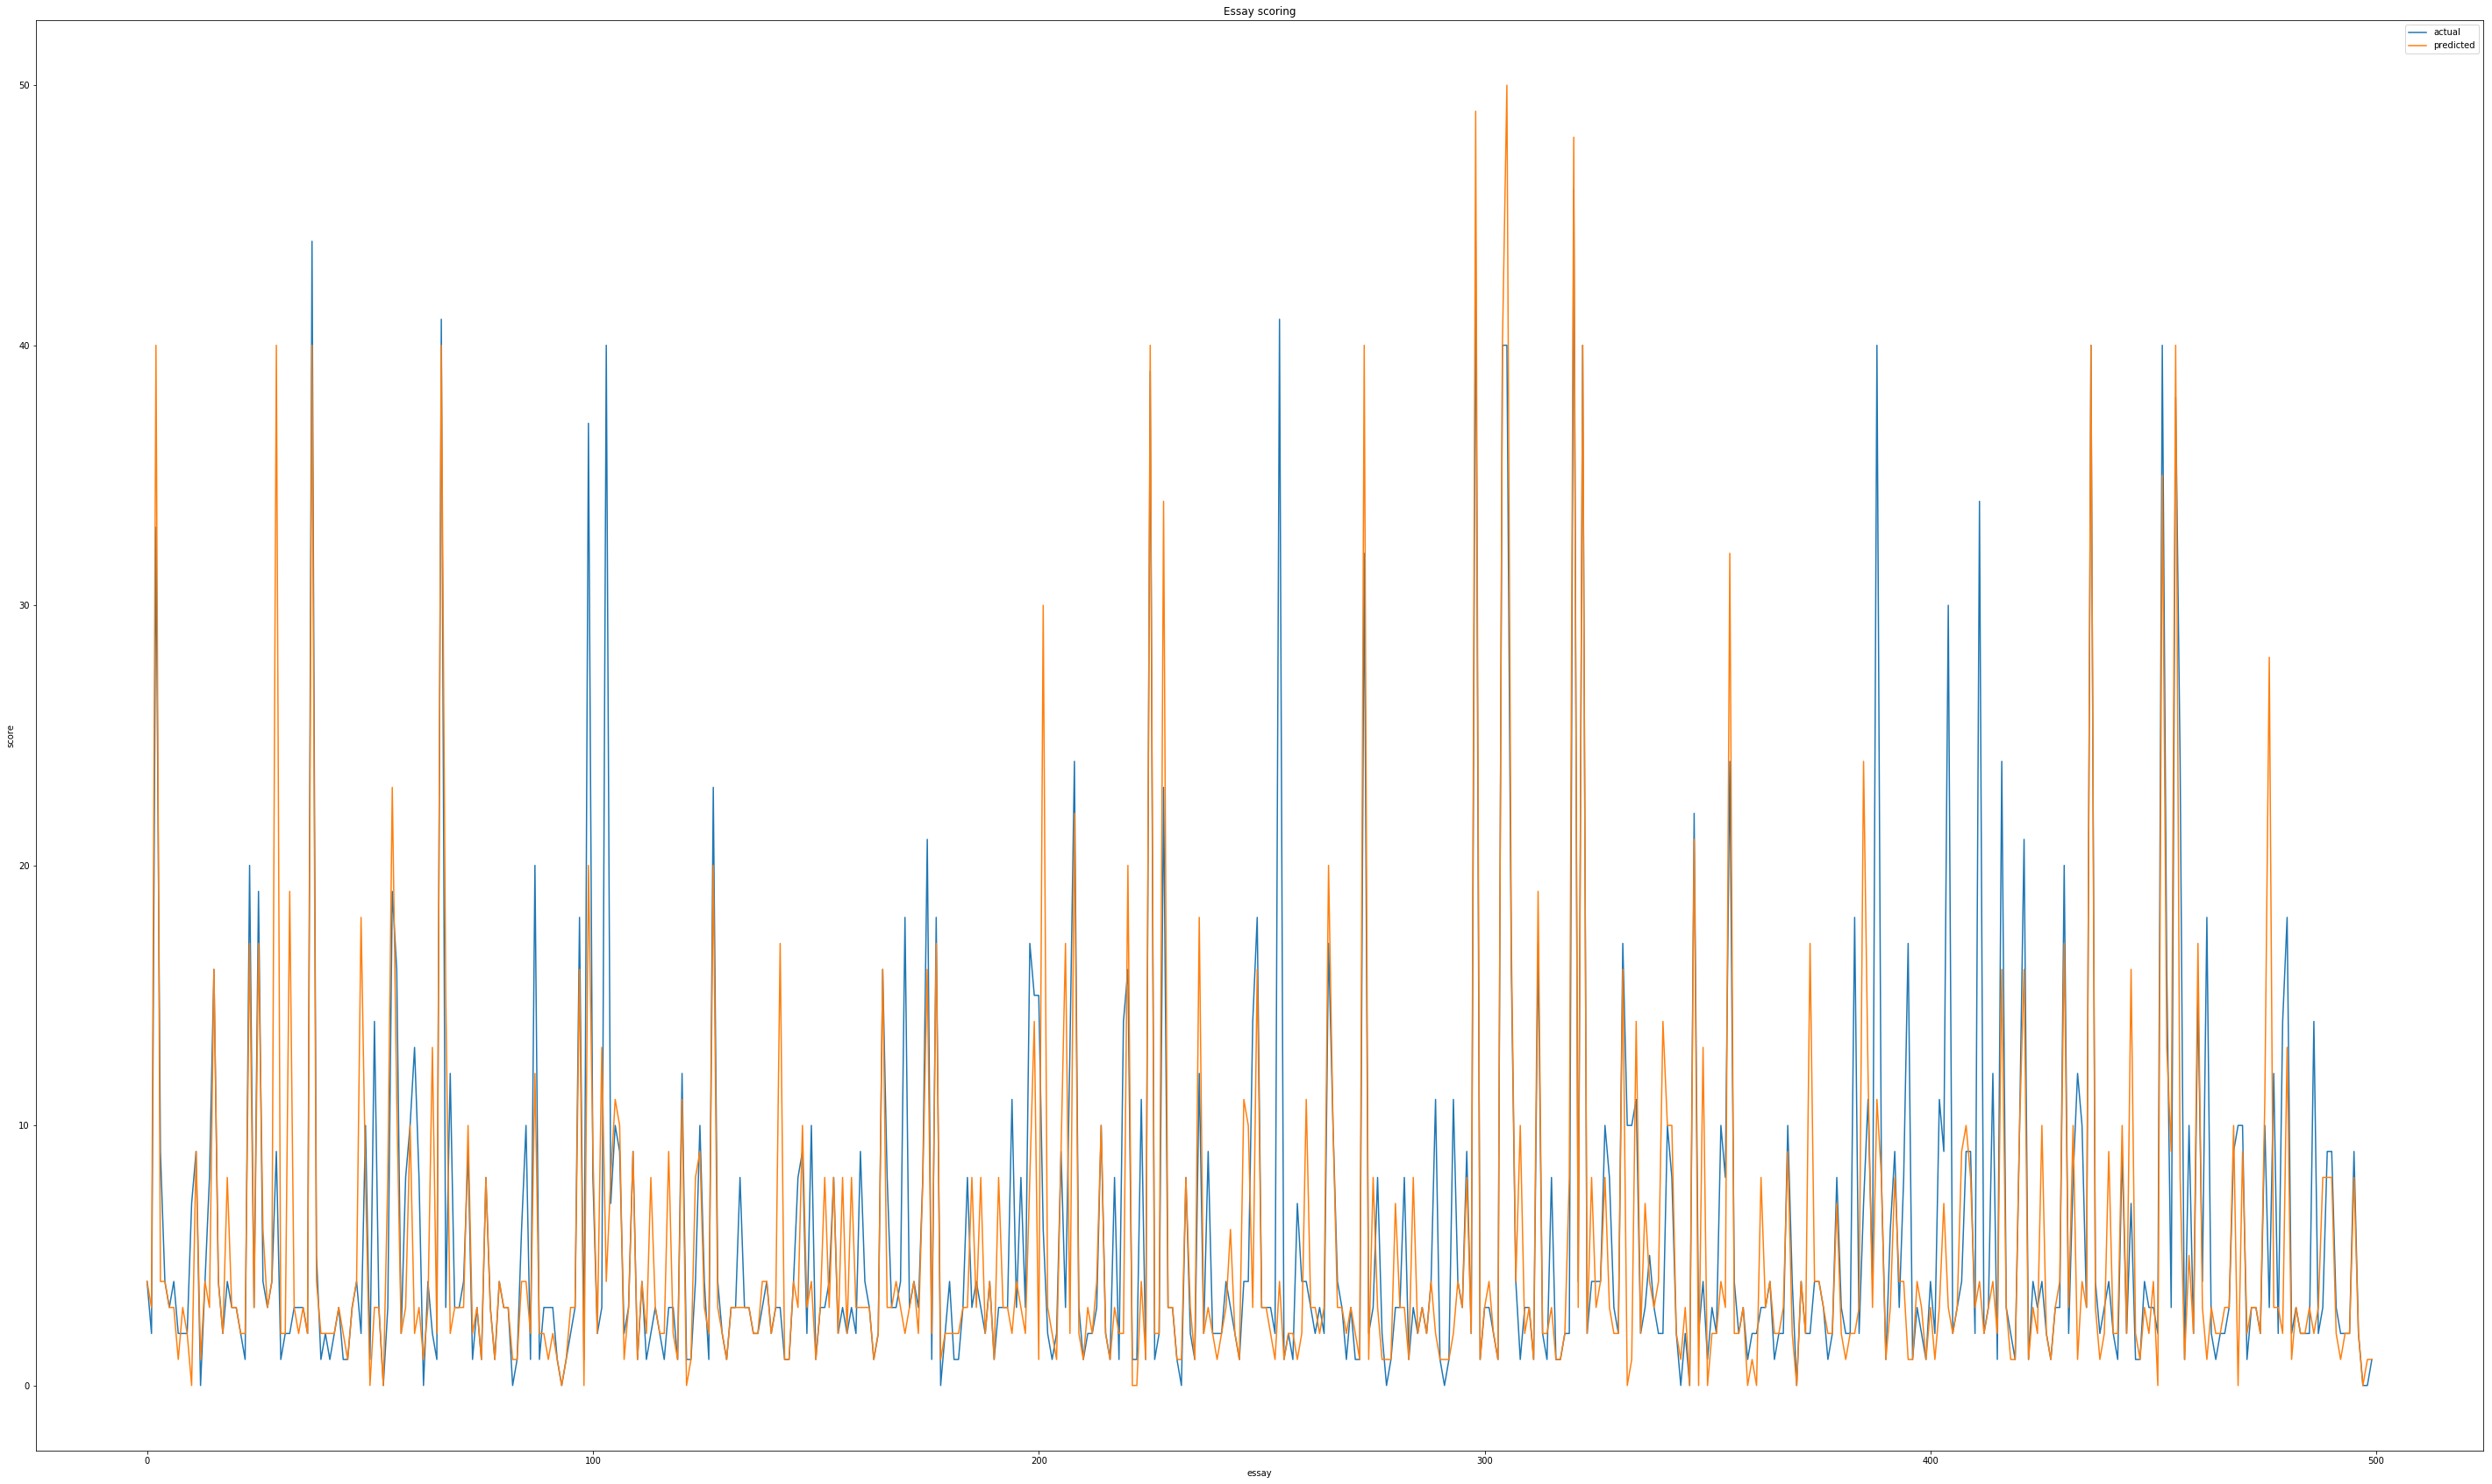

In [3]:
# import libraries: dataframe manipulation, machine learning, os tools
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn import preprocessing
import sklearn.metrics
import csv
# Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import recall_score, precision_score




essay_data = pd.read_csv("feature.csv")
data_clean = essay_data.dropna()

# encode categorical features
# done in R (C:\Users\JD87417\Desktop\python work\Coursera\python_adult2_clean.R)

# summary statistics including counts, mean, stdev, quartiles
data_clean.head(n=5)
data_clean.dtypes # data types of each variable
data_clean.describe()

# Split into training and testing sets
# Specifying predictor x variables
predictors = data_clean[["noOfCharacters","noOfWords","noOfUniqueWords","sentCount","noOfCommas","noOfSemicolons","noOfQuestions","noOfExclamation","noOfSpellErrors","meanWorldLength","avgWordLength","avgSentenceLength","stdDeviationSentence","noOfNounCount","noOfVerbCount","noOfAdjCount","noOfAdvCount","keywordRelevance"]]

# y repsonse variable
targets = data_clean.score

# concurrent split of x's, y, at 40%
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

# shape/dimensions of the DataFrame
pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

# Build model on training data
from sklearn.neighbors import KNeighborsClassifier

 
trainArr = pred_train
trainRes = tar_train
testArr = pred_test

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(trainArr, trainRes)
output = knn.predict(testArr)
# or predict on a specific example!
print(output)
predictions = output
plt.figure(figsize=(50,30))
# line 1 points
#x1 = range(0,tar_test.count())
x1 = range(0,500)
y1 = tar_test[:500]
# plotting the line 1 points 
plt.plot(x1, y1, label = "actual")
 
# line 2 points
x2 = x1
y2 = predictions[:500]
# plotting the line 2 points 
plt.plot(x2, y2, label = "predicted")
 
# naming the x axis
plt.xlabel('essay')
# naming the y axis
plt.ylabel('score')
# giving a title to my graph
plt.title('Essay scoring')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()
